In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster,StripePattern
import geopandas as gpd
import branca.colormap as cm
import descartes
import pyproj

In [ ]:
listings = pd.read_csv("listings.csv")
print(listings.shape)

(10272, 74)


<h2>a) Top areas with highest number of listing in neighbourhood

In [ ]:
x_map = listings['latitude'].median()
y_map = listings['longitude'].median()
print(x_map,y_map)

30.270175000000002 -97.745035


In [ ]:
lats = listings['latitude'].tolist()
longs = listings['longitude'].tolist()
locations = list(zip(lats, longs))

map1 = folium.Map(location=[x_map, y_map], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

<h2>b) Thematic map of neighbourhoods

In [ ]:
map_data = gpd.read_file("neighbourhoods.geojson")
map_data['neighbourhood'] = map_data.neighbourhood.astype(int)
map_data.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [ ]:
room_data = listings[['neighbourhood_cleansed','room_type','accommodates']]
room_data.reset_index(inplace = True)
room_data.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)
room_data.drop('index',axis=1,inplace = True)

I:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
I:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
map_data=map_data.merge(room_data,on="neighbourhood")
map_data.head()

,neighbourhood,neighbourhood_group,geometry,room_type,accommodates
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",Entire home/apt,10
1,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",Private room,2
2,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",Entire home/apt,4
3,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",Entire home/apt,6
4,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",Entire home/apt,8


In [ ]:
map_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10272 entries, 0 to 10271
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        10272 non-null  int32   
 1   neighbourhood_group  0 non-null      object  
 2   geometry             10272 non-null  geometry
 3   room_type            10272 non-null  object  
 4   accommodates         10272 non-null  int64   
dtypes: geometry(1), int32(1), int64(1), object(2)
memory usage: 441.4+ KB


In [ ]:
map_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
whole_home = map_data[map_data['room_type']=='Entire home/apt']
whole_home_count = pd.DataFrame({'neighbourhood': whole_home['neighbourhood'].value_counts().index, 
                                   'count': whole_home['neighbourhood'].value_counts().values})
whole_home_count.head()

,neighbourhood,count
0,78704,1589
1,78702,1065
2,78701,644
3,78703,475
4,78741,418


In [ ]:
single_home = map_data[(map_data['accommodates'] == 1) & ((map_data['room_type']=='Private room') | (map_data['room_type']=='Hotel room'))] 
single_home_count = pd.DataFrame({'neighbourhood':single_home['neighbourhood'].value_counts().index, 
                                   'count': single_home['neighbourhood'].value_counts().values})
single_home_count.head()

,neighbourhood,count
0,78745,24
1,78705,23
2,78741,23
3,78751,21
4,78748,19


In [ ]:
map_data = gpd.read_file("neighbourhoods.geojson")

In [ ]:
map2 = folium.Map(location=[x_map, y_map], zoom_start=11.4)

choro = folium.Choropleth(
    geo_data=map_data,
    data=whole_home_count,
    columns=['neighbourhood' ,'count'],
    key_on='feature.properties.neighbourhood',
    fill_color='OrRd', 
    fill_opacity=1, 
    line_opacity=0.5,
    legend_name='Count of Entire Home',
    highlight=True,
    reset=True
).add_to(map2)

style_function = "font-size: 15px; font-weight: bold"
choro.geojson.add_child(
    folium.features.GeoJsonTooltip(['neighbourhood'], style=style_function, labels=False))
map2

In [ ]:
map3 = folium.Map(location=[x_map, y_map], zoom_start=11.4)

choro1 = folium.Choropleth(
    geo_data=map_data,
    data=single_home_count,
    columns=['neighbourhood' ,'count'],
    nan_fill_color = 'grey',
    key_on='feature.properties.neighbourhood',
    fill_color='YlGn', 
    fill_opacity=1, 
    line_opacity=0.5,
    legend_name='Count of Single room',
    highlight=True,
    reset=True
).add_to(map3)

style_function = "font-size: 15px; font-weight: bold"
choro1.geojson.add_child(
    folium.features.GeoJsonTooltip(['neighbourhood'], style=style_function, labels=False))
map3

<h2>c) Top 10 Hosts

In [ ]:
hosts = listings.groupby(['host_id','host_name','host_since','host_is_superhost']).size().reset_index(name='num_host_listings')
hosts = hosts.sort_values(by=['num_host_listings'], ascending=False)
hosts = hosts[hosts['num_host_listings'] >= 20]
top = hosts.head(10)
top

,host_id,host_name,host_since,host_is_superhost,num_host_listings
6663,359036978,Kia,2020-07-28,t,358
5016,104309976,WanderJaunt,2016-11-19,f,131
5066,109638288,TurnKey Vacation Rentals,2017-01-03,f,82
1511,8167447,Martin,2013-08-14,f,81
5195,118565935,Renters Club,2017-02-28,f,56
6631,346827202,Madalynn,2020-05-19,f,48
5937,194953121,Christian,2018-06-11,f,45
6023,210733801,Above,2018-08-20,f,43
6694,368944610,Kia,2020-09-23,f,40
5272,124060715,Evolve Vacation Rental,2017-04-03,f,38


In [ ]:
top10 = top['host_name'].tolist()

In [ ]:
print("Top 10 host by their number of listings:");
for x in range(len(top10)):
    print(top10[x])

Top 10 host by their number of listings:
Kia
WanderJaunt
TurnKey Vacation Rentals
Martin
Renters Club
Madalynn
Christian
Above
Kia
Evolve Vacation Rental


<h2>d) Insights and Review Metrics

<br>1.According to our data, hotel rooms and shared rooms are very rare in Austin where people are more likely to live in their 
separate homes,apartment and private rooms.<br>
2.Martin, Mo, Amanda, Michael and Leo are the top hosts whose listings of private rooms are high. we can see that Martin and Leo 
are professional hosts because they seems to be in this field since 2013.<br>
3.Kia, WanderJaunt, TurnKey Vacation Rentals, Martin, Renters Club, Madalynn, Christian, Above, Kia, Evolve Vacation Rental are
top 10 host by their highest number of listings.<br>
4.We can see that neighbourhood id of 78704 has highest average price(in dollars)<br>
5.We can see that there is constant average review score(atleast 10 reviews) for almost every neighbourhood in Austin

<p>Below you can see the scores distribution of all those categories(Location, Cleanliness, Communication, Value, Arrival, Acurracy). What caught my eye is that scores seem really high across the board.

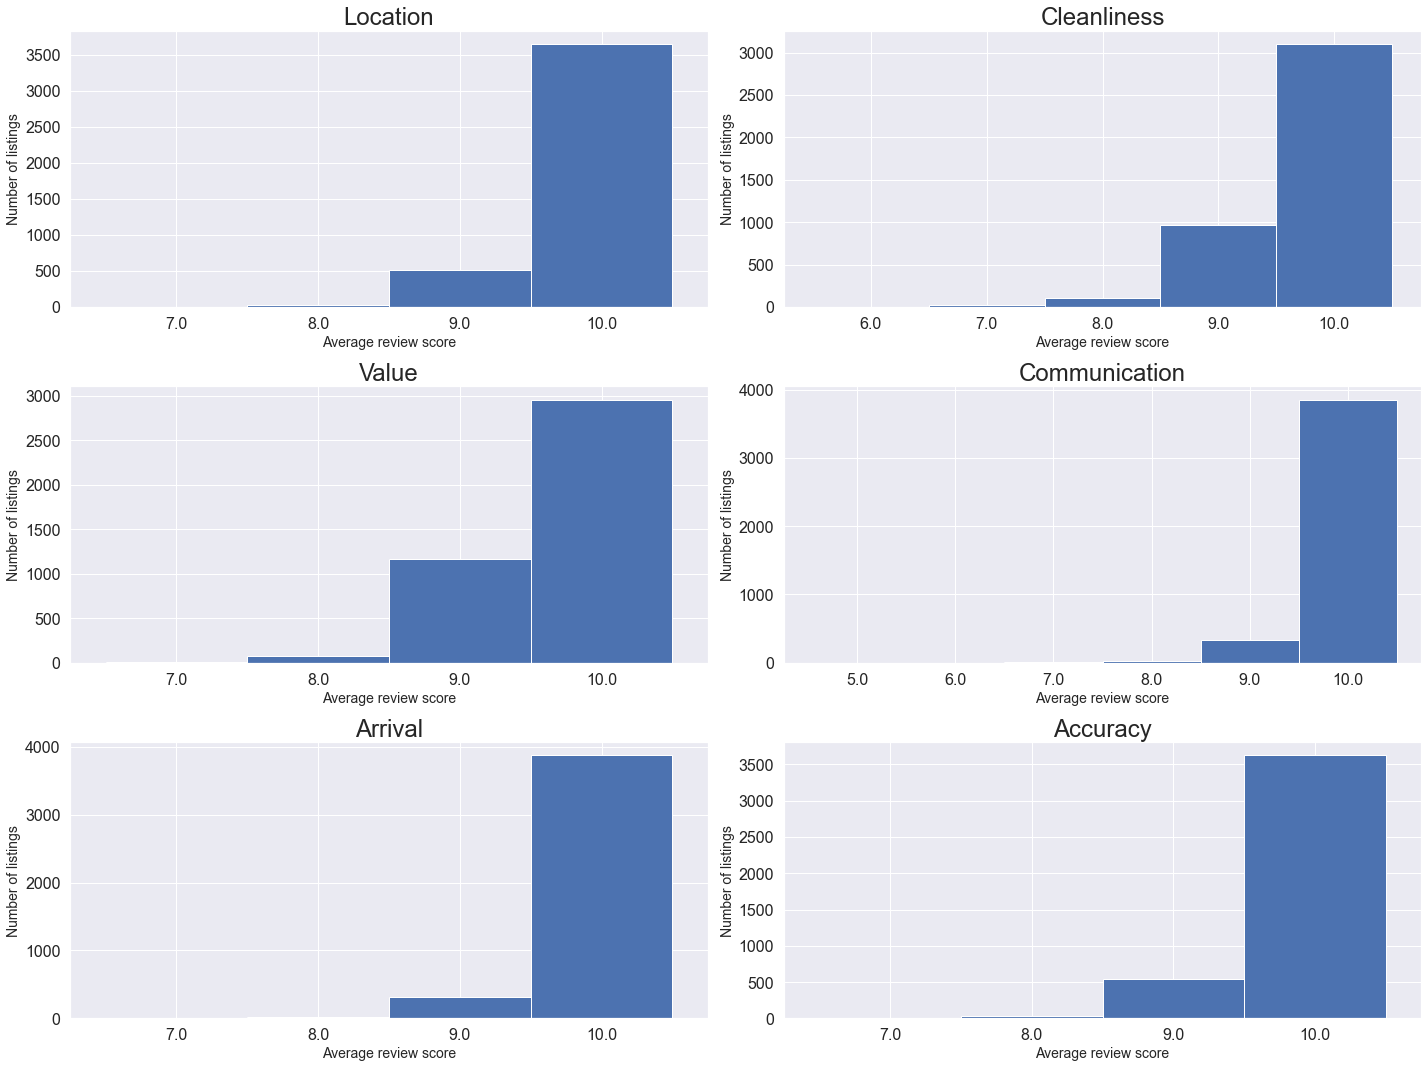

In [ ]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()
